In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.labelsize': 20})
plt.rcParams.update({'axes.titlesize': 20})
plt.rcParams.update({'xtick.labelsize': 14})
plt.rcParams.update({'ytick.labelsize': 14})

In [142]:
# Load the data
df_0 = pd.read_csv("data/final/faulty/FaultyMotor1_50.csv", header=None)
df_1 = pd.read_csv("data/final/normal/NormalMotor150mm_50.csv", header=None)

In [143]:
def get_fft(mic_data, sr):
    window = np.kaiser(len(mic_data), 10)
    mic_data = np.multiply(mic_data, window)
    mic_fft = np.fft.rfft(mic_data, norm="forward")
    mic_freq = np.fft.rfftfreq(len(mic_data), 1/sr)
    return mic_fft, mic_freq

# Function that returns a specific column of a dataframe
def c(df:pd.DataFrame, col_number):
    return df.iloc[:, col_number]

In [144]:
# Change the variables below to match the data
mic_data = [c(df_0, 1), c(df_1, 1)]
sr = [20000, 20000, 20000]
labels = ['Faulty Motor', 'Normal Motor']

In [145]:
# Calculate the FFT of the data
fft_data = []
freq_data = []
for i in range(len(mic_data)):
    fft, freq = get_fft(mic_data[i], sr[i])
    fft_data.append(fft)
    freq_data.append(freq)

In [146]:
# Calculate the amplitude of the FFT
fft_amp_data = []
for i in range(len(fft_data)):
    fft_amp = np.abs(fft_data[i])
    fft_amp_data.append(fft_amp)

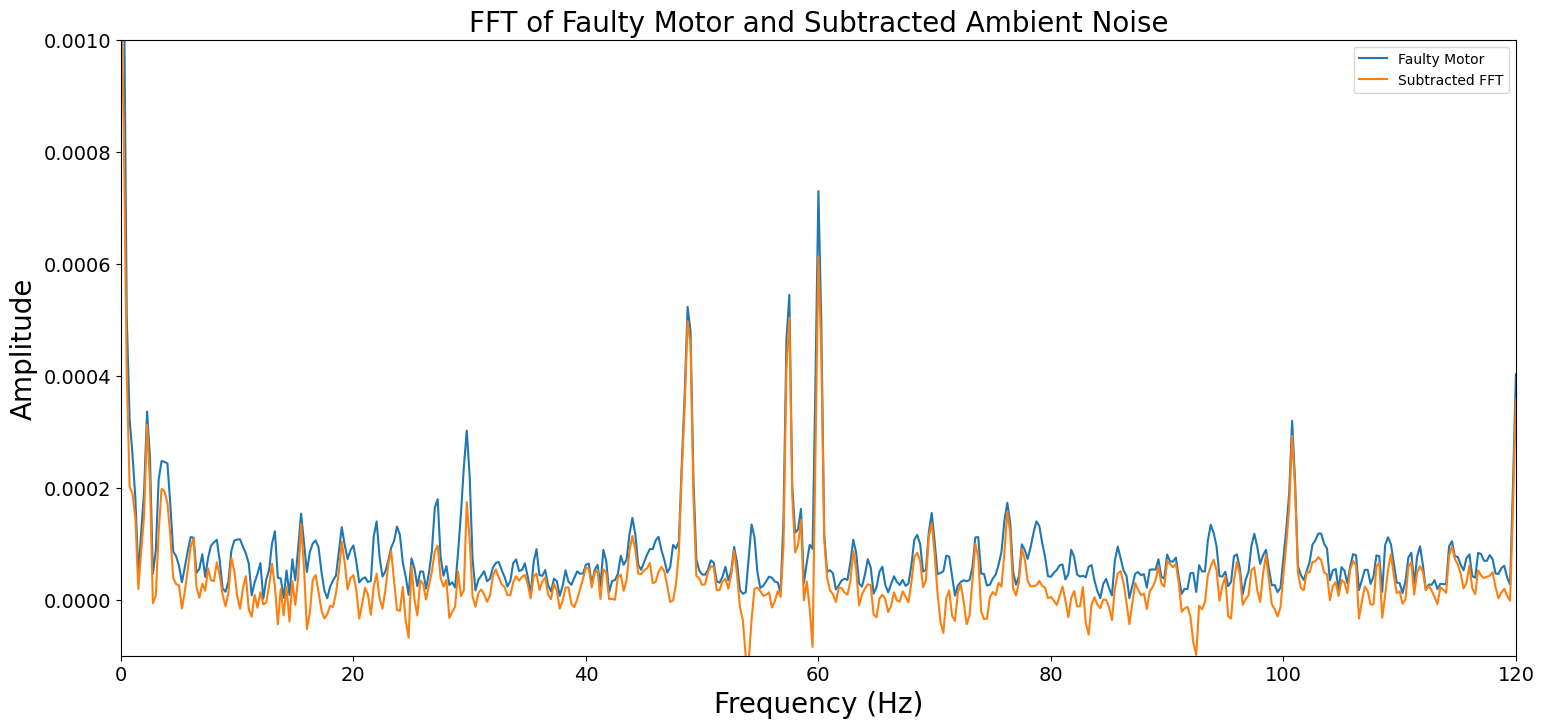

In [153]:
# Plot the data
plt.figure(figsize=(18, 8))
# Add verticle lines in the list to graph them
verticle_lines = []
for i in verticle_lines:
    plt.axvline(i, color='r', linestyle='--')
for i in range(len(fft_amp_data)):
    plt.plot(freq_data[i], fft_amp_data[i], label=labels[i])
plt.title('FFT of Faulty Motor and Subtracted Ambient Noise')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 120)
plt.ylim(-0.0001, 0.001)
plt.legend(loc='upper right')
plt.show()